In [5]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def convert_base_x_to_y(number: str, base_x: int, base_y: int) -> str:
    """
    Convert a number from base X to base Y.

    Args:
        number (str): The number in base X as a string.
        base_x (int): The base of the input number (2 <= base_x <= 10).
        base_y (int): The base to convert to (2 <= base_y <= 10).

    Returns:
        str: The number in base Y as a string.
    """
    if not (2 <= base_x <= 10 and 2 <= base_y <= 10):
        raise ValueError("Base X and Base Y must be between 2 and 10 inclusive.")

    # Convert the number from base X to decimal (base 10)
    decimal_value = int(number, base_x)

    # Convert the decimal value to base Y
    result = ""
    while decimal_value > 0:
        result = str(decimal_value % base_y) + result
        decimal_value //= base_y

    return result or "0"  # Return "0" if the input number is "0"

# Example usage:
number_in_base_x = "1010"  # Binary (base 2)
base_x = 2
base_y = 8
converted_number = convert_base_x_to_y(number_in_base_x, base_x, base_y)
print(f"Number {number_in_base_x} in base {base_x} is {converted_number} in base {base_y}.")

Number 1010 in base 2 is 12 in base 8.


In [7]:
def convert_base_x_to_y(number: int, base_x: int, base_y: int) -> int:
    """
    Convert a number from base X to base Y, ensuring inputs and outputs are integers.

    Args:
        number (int): The number in base X as an integer.
        base_x (int): The base of the input number (2 <= base_x <= 10).
        base_y (int): The base to convert to (2 <= base_y <= 10).

    Returns:
        int: The number in base Y as an integer.
    """
    if not (2 <= base_x <= 10 and 2 <= base_y <= 10):
        raise ValueError("Base X and Base Y must be between 2 and 10 inclusive.")

    # Convert the number from base X to decimal (base 10)
    decimal_value = int(str(number), base_x)

    # Convert the decimal value to base Y
    result = 0
    multiplier = 1
    while decimal_value > 0:
        result += (decimal_value % base_y) * multiplier
        decimal_value //= base_y
        multiplier *= 10

    return result

In [8]:
def generate_base_conversion_pairs(base_in: int, base_out: int, num_to_generate: int, lower_bound: int = 1, upper_bound: int = 1000):
    """
    Generate input-output pairs for numbers converted between two bases, with customizable bounds.

    Args:
        base_in (int): The base of the input numbers (2 <= base_in <= 10).
        base_out (int): The base of the output numbers (2 <= base_out <= 10).
        num_to_generate (int): The number of input-output pairs to generate.
        lower_bound (int): The lower bound for the random numbers (inclusive).
        upper_bound (int): The upper bound for the random numbers (inclusive).

    Returns:
        list: A list of tuples where each tuple contains an input number (str) in base_in
              and its corresponding output number (str) in base_out.
    """
    if not (2 <= base_in <= 10 and 2 <= base_out <= 10):
        raise ValueError("Base_in and Base_out must be between 2 and 10 inclusive.")
    if lower_bound < 0 or upper_bound < lower_bound:
        raise ValueError("Bounds must be non-negative and lower_bound <= upper_bound.")

    pairs = []
    for _ in range(num_to_generate):
        # Generate a random number within the specified bounds
        decimal_value = random.randint(lower_bound, upper_bound)
        input_number = format(decimal_value, f'0{base_in}b') if base_in == 2 else str(decimal_value)

        # Convert the number to base_out
        output_number = convert_base_x_to_y(input_number, base_in, base_out)
        pairs.append((input_number, output_number))

    return pairs

In [9]:
def generate_base_conversion_pairs_fast(base_in: int, base_out: int, num_to_generate: int, lower_bound: int = 1, upper_bound: int = 1000, integer_noise_prob: float = 0):
    """
    Generate input-output pairs for numbers converted between two bases using NumPy for faster computation.

    Args:
        base_in (int): The base of the input numbers (2 <= base_in <= 10).
        base_out (int): The base of the output numbers (2 <= base_out <= 10).
        num_to_generate (int): The number of input-output pairs to generate.
        lower_bound (int): The lower bound for the random numbers (inclusive).
        upper_bound (int): The upper bound for the random numbers (inclusive).

    Returns:
        list: A list of tuples where each tuple contains an input number (str) in base_in
              and its corresponding output number (str) in base_out.
    """
    if not (2 <= base_in <= 10 and 2 <= base_out <= 10):
        raise ValueError("Base_in and Base_out must be between 2 and 10 inclusive.")
    if lower_bound < 0 or upper_bound < lower_bound:
        raise ValueError("Bounds must be non-negative and lower_bound <= upper_bound.")

    decimal_values = np.random.randint(lower_bound, upper_bound + 1, size=num_to_generate)

    if integer_noise_prob > 0:
        zeroes = np.zeros((num_to_generate))
        pos_array = (np.random.rand(num_to_generate) < integer_noise_prob).astype(int)
        neg_array = (np.random.rand(num_to_generate) < integer_noise_prob).astype(int)
        zeroes += pos_array
        zeroes -= neg_array

    input_numbers = np.vectorize(lambda x: int(format(x, f'0{base_in}b') if base_in == 2 else str(x)))(decimal_values)

    output_numbers = np.vectorize(lambda x: int(np.base_repr(x, base_out)))(decimal_values)

    pairs = list(zip(input_numbers, output_numbers))

    return pairs

In [10]:
# Example usage of generate_base_conversion_pairs
base_in = 2
base_out = 10
num_to_generate = 50
lower_bound = 1
upper_bound = 100

pairs = generate_base_conversion_pairs_fast(base_in, base_out, num_to_generate, lower_bound, upper_bound)
print(pairs)

[(1001100, 76), (1000011, 67), (111100, 60), (100100, 36), (1001111, 79), (1000011, 67), (1001011, 75), (100001, 33), (111001, 57), (1011010, 90), (1000011, 67), (10011, 19), (111, 7), (100, 4), (1001000, 72), (1001111, 79), (101100, 44), (11001, 25), (1111, 15), (111000, 56), (1011110, 94), (110101, 53), (1001110, 78), (1100010, 98), (110, 6), (11100, 28), (101100, 44), (101100, 44), (101101, 45), (1001001, 73), (1000101, 69), (11111, 31), (11001, 25), (11101, 29), (111111, 63), (111100, 60), (101001, 41), (101100, 44), (1000100, 68), (100100, 36), (1110, 14), (1011001, 89), (1100000, 96), (11, 3), (1010011, 83), (1011101, 93), (100001, 33), (10010, 18), (1000011, 67), (110110, 54)]


In [11]:
import numpy as np

def generate_conversion_datasets_random_bases(base_out: int = 10,
                                              a: int = 1000,
                                              b: int = 50,
                                              c: int = 10,
                                              lower_bound: int = 1,
                                              upper_bound: int = 1000,
                                              integer_noise_prob: float = 0):
    """
    Generate train/test splits of base-conversion pairs, picking a random input base
    in [2..9] for each of the a runs, and ensuring each run's train & test use the same base.

    Args:
        base_out (int):  Output base (2–10).
        a (int):         Number of separate “runs” (default 1000).
        b (int):         Training examples per run (default 50).
        c (int):         Test examples per run (default 10).
        lower_bound (int): Min random integer, inclusive.
        upper_bound (int): Max random integer, inclusive.

    Returns:
        train_X (np.ndarray): shape (a, b), dtype=int — inputs in their randomly chosen base_in
        train_Y (np.ndarray): shape (a, b), dtype=int — corresponding outputs in base_out
        test_X  (np.ndarray): shape (a, c), dtype=int
        test_Y  (np.ndarray): shape (a, c), dtype=int
    """
    # sample a random base_in for each run, from 2 to 9 inclusive
    base_ins = np.random.randint(2, 10, size=a)

    # prepare empty arrays
    train_X = np.zeros((a, b), dtype=int)
    train_Y = np.zeros((a, b), dtype=int)
    test_X  = np.zeros((a, c), dtype=int)
    test_Y  = np.zeros((a, c), dtype=int)

    # for each run, generate b train and c test pairs with the same base_in
    for i, base_in in enumerate(base_ins):
        # generate training pairs
        train_pairs = generate_base_conversion_pairs_fast(
            base_in, base_out, b, lower_bound, upper_bound, integer_noise_prob=integer_noise_prob
        )
        # generate test pairs
        test_pairs  = generate_base_conversion_pairs_fast(
            base_in, base_out, c, lower_bound, upper_bound, integer_noise_prob=integer_noise_prob
        )

        # convert to arrays and split into X (inputs) / Y (outputs)
        train_arr = np.array(train_pairs, dtype=int)   # shape (b, 2)
        test_arr  = np.array(test_pairs,  dtype=int)   # shape (c, 2)

        train_X[i] = train_arr[:, 0]
        train_Y[i] = train_arr[:, 1]
        test_X[i]  = test_arr[:, 0]
        test_Y[i]  = test_arr[:, 1]

    return train_X, train_Y, test_X, test_Y


In [12]:
def predict_mean(train_X: np.ndarray,
                train_Y: np.ndarray,
                 test_X:  np.ndarray) -> np.ndarray:
    """
    Predict test_Y by using the mean of each run’s train_Y for all its test examples.

    Args:
        train_Y (np.ndarray): shape (a, b), training labels for each of a runs
        test_X  (np.ndarray): shape (a, c), test inputs for each of a runs (only used for shape)

    Returns:
        np.ndarray: shape (a, c), predicted labels (floats) for each run’s test set
    """
    # number of runs and number of test examples per run
    a, b = train_Y.shape
    _, c = test_X.shape

    # compute per-run mean of the b train_Y values
    means = train_Y.mean(axis=1)       # shape (a,)

    # broadcast each mean to all c test positions
    preds = np.repeat(means[:, np.newaxis], c, axis=1)  # shape (a, c)

    return preds


In [13]:
def predict_3nn(train_X: np.ndarray,
                train_Y: np.ndarray,
                test_X:  np.ndarray,
                k:       int = 3) -> np.ndarray:
    """
    Predict test_Y using k-NN (default k=3) for each run separately.

    Args:
        train_X (np.ndarray): shape (a, b), training inputs for each of a runs
        train_Y (np.ndarray): shape (a, b), training labels for each of a runs
        test_X  (np.ndarray): shape (a, c), test inputs for each of a runs
        k       (int):        number of neighbors to use (default 3)

    Returns:
        np.ndarray: shape (a, c), predicted labels for each run’s test set
    """
    a, b = train_X.shape
    _, c = test_X.shape

    # initialize output array
    preds = np.zeros((a, c), dtype=train_Y.dtype)

    for i in range(a):
        # for each test example in run i
        for j in range(c):
            # compute distances to all b training points
            dists = np.abs(train_X[i] - test_X[i, j])
            # find indices of the k smallest distances
            nn_idx = np.argsort(dists)[:k]
            # get their labels
            nn_labels = train_Y[i, nn_idx]
            # pick the most frequent label (majority vote)
            values, counts = np.unique(nn_labels, return_counts=True)
            preds[i, j] = values[np.argmax(counts)]

    return preds


In [14]:
def predict_linear_regression(train_X: np.ndarray,
                              train_Y: np.ndarray,
                              test_X:  np.ndarray) -> np.ndarray:
    """
    Predict test_Y by fitting a simple linear regression (Y = wX + b) per run.

    Args:
        train_X (np.ndarray): shape (a, b), training inputs for each of a runs
        train_Y (np.ndarray): shape (a, b), training targets for each of a runs
        test_X  (np.ndarray): shape (a, c), test inputs for each of a runs

    Returns:
        np.ndarray: shape (a, c), predicted targets for each run’s test set
    """
    a, c = test_X.shape
    preds = np.zeros((a, c), dtype=float)

    for i in range(a):
        # Extract this run's data
        X_i = train_X[i]
        y_i = train_Y[i]

        # Build design matrix [X_i, 1]
        D = np.vstack([X_i, np.ones_like(X_i)]).T  # shape (b, 2)

        # Solve least squares for [w, b]
        (w, b), *_ = np.linalg.lstsq(D, y_i, rcond=None)

        # Predict on test set
        preds[i] = w * test_X[i] + b

    return preds


In [15]:
from sklearn.neural_network import MLPRegressor

def predict_mlp_regression(train_X: np.ndarray,
                           train_Y: np.ndarray,
                           test_X:  np.ndarray,
                           hidden_layer_sizes: tuple = (32,),
                           max_iter: int = 10000) -> np.ndarray:
    """
    Predict test_Y by fitting an MLP regressor per run.

    Args:
        train_X (np.ndarray): shape (a, b), training inputs for each of a runs
        train_Y (np.ndarray): shape (a, b), training targets for each of a runs
        test_X  (np.ndarray): shape (a, c), test inputs for each of a runs
        hidden_layer_sizes (tuple): hidden-layer sizes for the MLP (default (32,))
        max_iter (int): maximum iterations for training (default 200)

    Returns:
        np.ndarray: shape (a, c), predicted targets for each run’s test set
    """
    a, b = train_X.shape
    _, c = test_X.shape
    preds = np.zeros((a, c), dtype=float)

    for i in range(a):
        # Prepare data for run i
        X_i = train_X[i].reshape(-1, 1)  # shape (b, 1)
        y_i = train_Y[i]                 # shape (b,)
        X_test_i = test_X[i].reshape(-1, 1)  # shape (c, 1)

        # Initialize and fit the MLP regressor
        mlp = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes,
                           activation='relu',
                           solver='adam',
                           max_iter=max_iter,
                           random_state=0)
        mlp.fit(X_i, y_i)

        # Predict on the test set for run i
        preds[i] = mlp.predict(X_test_i)

    return preds


In [16]:
def loss(test_Y, test_Y_hat):
    """
    Calculate the loss between the true and predicted values.

    Args:
        train_Y (np.ndarray): True output data.
        test_Y_hat (np.ndarray): Predicted output data.

    Returns:
        float: The calculated loss.
    """
    # Calculate the loss
    return np.mean((test_Y - test_Y_hat) ** 2)

In [17]:
train_X, train_Y, test_X, test_Y = generate_conversion_datasets_random_bases(a = 100)
print(train_X.shape)
print(train_Y.shape)  
print(test_X.shape)  
print(test_Y.shape) 

(100, 50)
(100, 50)
(100, 10)
(100, 10)


In [18]:
average_predictions = predict_mean(train_X, train_Y, test_X)
assert average_predictions.shape == (100, 10), f"Expected shape (100, 10), got {average_predictions.shape}"

mse_loss = loss(test_Y, average_predictions)
print(f"Mean Squared Error Loss: {mse_loss}")

Mean Squared Error Loss: 85820.626648


In [19]:
nearest_neighbors = predict_3nn(train_X, train_Y, test_X, k=1)
assert nearest_neighbors.shape == (100, 10), f"Expected shape (100, 10), got {nearest_neighbors.shape}"

mse_loss = loss(test_Y, nearest_neighbors)
print(f"Mean Squared Error Loss: {mse_loss}")

Mean Squared Error Loss: 228.52


In [20]:
regression_predictions = predict_linear_regression(train_X, train_Y, test_X)
assert regression_predictions.shape == (100, 10), f"Expected shape (100, 10), got {regression_predictions.shape}"
mse_loss = loss(test_Y, regression_predictions)
print(f"Mean Squared Error Loss: {mse_loss}")

Mean Squared Error Loss: 2191.519447659422


In [21]:
# mlp_predictions = predict_mlp_regression(train_X, train_Y, test_X)
# assert mlp_predictions.shape == (100, 10), f"Expected shape (100, 10), got {mlp_predictions.shape}"
# mse_loss = loss(test_Y, mlp_predictions)
# print(f"Mean Squared Error Loss: {mse_loss}")

In [22]:
average_lossses = []
nearest_neighbors_losses = []
nearest_neighbors_3_losses = []
regression_losses = []

for in_context_examples in range(1,16):
    train_X, train_Y, test_X, test_Y = generate_conversion_datasets_random_bases(a = 1280, b = in_context_examples, c = 1, lower_bound = 1, upper_bound = 200)
    average_predictions = predict_mean(train_X, train_Y, test_X)
    assert average_predictions.shape == (1280, 1), f"Expected shape (1280, 1), got {average_predictions.shape}"
    nn_predictions = predict_3nn(train_X, train_Y, test_X, k=1)
    assert nn_predictions.shape == (1280, 1), f"Expected shape (1280, 1), got {nn_predictions.shape}"
    nn3_predictions = predict_3nn(train_X, train_Y, test_X, k=3)
    assert nn_predictions.shape == (1280, 1), f"Expected shape (1280, 1), got {nn_predictions.shape}"
    regression_predictions = predict_linear_regression(train_X, train_Y, test_X)
    assert regression_predictions.shape == (1280, 1), f"Expected shape (1280, 1), got {regression_predictions.shape}"
    average_loss = loss(test_Y, average_predictions)
    nn_loss = loss(test_Y, nn_predictions)
    nn3_loss = loss(test_Y, nn3_predictions)
    regression_loss = loss(test_Y, regression_predictions)
    print(f"Average Loss: {average_loss}, Nearest Neighbor Loss: {nn_loss}, 3 Nearest Neighbor Loss: {nn3_loss}, Regression Loss: {regression_loss}")
    average_lossses.append(average_loss)
    nearest_neighbors_losses.append(nn_loss)
    nearest_neighbors_3_losses.append(nn3_loss)
    regression_losses.append(regression_loss)


Average Loss: 6616.0484375, Nearest Neighbor Loss: 6616.0484375, 3 Nearest Neighbor Loss: 6616.0484375, Regression Loss: 23527626.891124967
Average Loss: 5020.819921875, Nearest Neighbor Loss: 3017.06640625, 3 Nearest Neighbor Loss: 6984.8796875, Regression Loss: 2007796806.5301049
Average Loss: 4414.244791666667, Nearest Neighbor Loss: 1635.8953125, 3 Nearest Neighbor Loss: 7182.88046875, Regression Loss: 94489.57965782292
Average Loss: 4154.08896484375, Nearest Neighbor Loss: 1100.7390625, 3 Nearest Neighbor Loss: 4651.23203125, Regression Loss: 27600.708547073067
Average Loss: 4184.976468750001, Nearest Neighbor Loss: 757.12109375, 3 Nearest Neighbor Loss: 3312.16953125, Regression Loss: 2011.0466860025622
Average Loss: 3784.051779513889, Nearest Neighbor Loss: 550.01171875, 3 Nearest Neighbor Loss: 2233.98203125, Regression Loss: 5788.152210436302
Average Loss: 3843.8212531887752, Nearest Neighbor Loss: 470.78828125, 3 Nearest Neighbor Loss: 1819.425, Regression Loss: 411.101347317

In [35]:
base_model_losses = [3217.3, 2373.39, 1666.32, 1319.725, 1056.964, 896.5666666666667, 846.3542857142858, 835.3725, 870.3044444444445, 875.374, 969.3963636363636, 1045.43, 1195.6615384615384, 1215.56, 1453.8586666666667]
# base_model_losses = [3217.3, 1529.48, 252.18, 279.94, 5.92, 94.58, 545.08, 758.5, 1149.76, 921.0, 1909.62, 1881.8, 2998.44, 1474.24, 4790.04]
mixture_model_losses = [1588.88, 955.22, 659.96, 547.005, 442.5, 373.2866666666667, 321.2914285714286, 301.43, 268.6977777777778, 250.276, 227.77454545454546, 225.925, 208.81230769230768, 213.94285714285715, 204.67066666666668] 
# mixture_model_losses = [1588.88, 321.56, 69.44, 208.14, 24.48, 27.22, 9.32, 162.4, 6.84, 84.48, 2.76, 205.58, 3.46, 280.64, 74.86]

In [24]:
icl_losses = [4000,  5500,  8500,  3000,  9000,  2500, 17500, 10000, 17000, 16000]

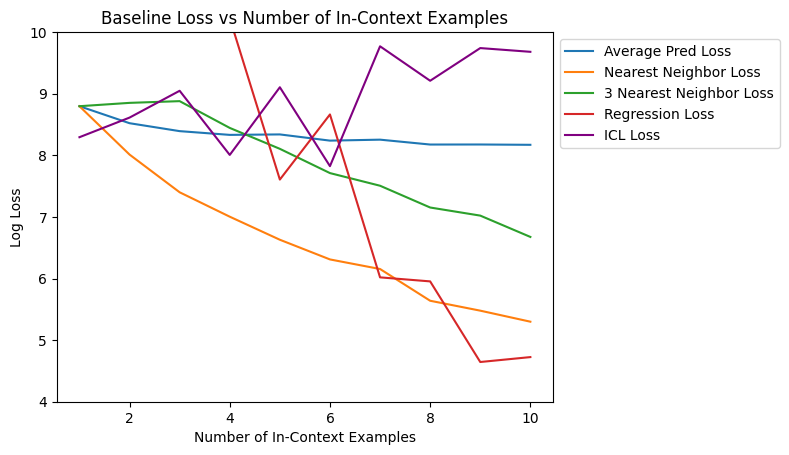

In [25]:
data_start = 0
desired_data_lenght = 10

plt.plot(range(data_start+1, desired_data_lenght+1), np.log(average_lossses[data_start:desired_data_lenght]), label='Average Pred Loss')
plt.plot(range(data_start+1, desired_data_lenght+1), np.log(nearest_neighbors_losses[data_start:desired_data_lenght]), label='Nearest Neighbor Loss')
plt.plot(range(data_start+1, desired_data_lenght+1), np.log(nearest_neighbors_3_losses[data_start:desired_data_lenght]), label='3 Nearest Neighbor Loss')
plt.plot(range(data_start+1, desired_data_lenght+1), np.log(regression_losses[data_start:desired_data_lenght]), label='Regression Loss')
# plt.plot(range(data_start+1, desired_data_lenght+1), np.log(base_model_losses[data_start:desired_data_lenght]), label='Base Model Loss')
# plt.plot(range(data_start+1, desired_data_lenght+1), np.log(mixture_model_losses[data_start:desired_data_lenght]), label='Mixture Model Loss')

plt.plot(range(data_start+1, desired_data_lenght+1), np.log(icl_losses[data_start:desired_data_lenght]), label='ICL Loss', color='purple')
plt.ylim(4, 10)
plt.xlabel('Number of In-Context Examples')
plt.ylabel('Log Loss')
plt.title('Baseline Loss vs Number of In-Context Examples')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

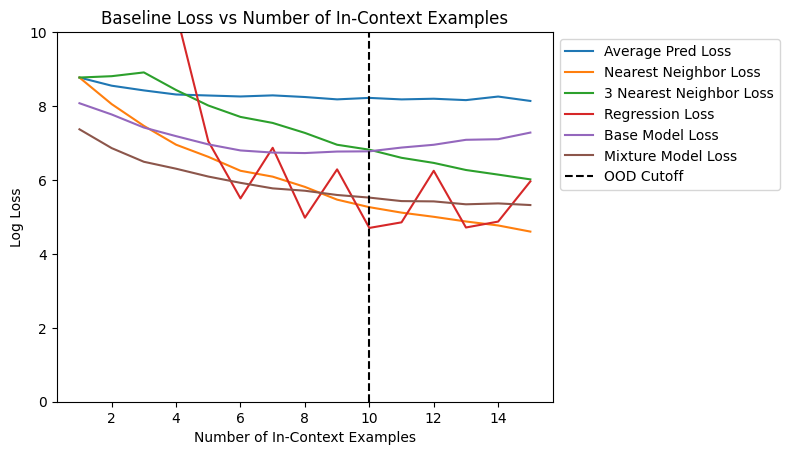

In [36]:
data_start = 0
desired_data_lenght = 15

plt.plot(range(data_start+1, desired_data_lenght+1), np.log(average_lossses[data_start:desired_data_lenght]), label='Average Pred Loss')
plt.plot(range(data_start+1, desired_data_lenght+1), np.log(nearest_neighbors_losses[data_start:desired_data_lenght]), label='Nearest Neighbor Loss')
plt.plot(range(data_start+1, desired_data_lenght+1), np.log(nearest_neighbors_3_losses[data_start:desired_data_lenght]), label='3 Nearest Neighbor Loss')
plt.plot(range(data_start+1, desired_data_lenght+1), np.log(regression_losses[data_start:desired_data_lenght]), label='Regression Loss')
plt.plot(range(data_start+1, desired_data_lenght+1), np.log(base_model_losses[data_start:desired_data_lenght]), label='Base Model Loss')
plt.plot(range(data_start+1, desired_data_lenght+1), np.log(mixture_model_losses[data_start:desired_data_lenght]), label='Mixture Model Loss')

# Add vertical line at x=10
plt.axvline(x=10, color='black', linestyle='--', label='OOD Cutoff')

plt.ylim(0, 10)
plt.xlabel('Number of In-Context Examples')
plt.ylabel('Log Loss')
plt.title('Baseline Loss vs Number of In-Context Examples')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [28]:
# Integer Noise
average_lossses = []
nearest_neighbors_losses = []
nearest_neighbors_3_losses = []
regression_losses = []

for in_context_examples in range(1,16):
    train_X, train_Y, test_X, test_Y = generate_conversion_datasets_random_bases(a = 1280, b = in_context_examples, c = 1, lower_bound = 1, upper_bound = 200, integer_noise_prob = 0.15)
    average_predictions = predict_mean(train_X, train_Y, test_X)
    assert average_predictions.shape == (1280, 1), f"Expected shape (1280, 1), got {average_predictions.shape}"
    nn_predictions = predict_3nn(train_X, train_Y, test_X, k=1)
    assert nn_predictions.shape == (1280, 1), f"Expected shape (1280, 1), got {nn_predictions.shape}"
    nn3_predictions = predict_3nn(train_X, train_Y, test_X, k=3)
    assert nn_predictions.shape == (1280, 1), f"Expected shape (1280, 1), got {nn_predictions.shape}"
    regression_predictions = predict_linear_regression(train_X, train_Y, test_X)
    assert regression_predictions.shape == (1280, 1), f"Expected shape (1280, 1), got {regression_predictions.shape}"
    average_loss = loss(test_Y, average_predictions)
    nn_loss = loss(test_Y, nn_predictions)
    nn3_loss = loss(test_Y, nn3_predictions)
    regression_loss = loss(test_Y, regression_predictions)
    print(f"Average Loss: {average_loss}, Nearest Neighbor Loss: {nn_loss}, 3 Nearest Neighbor Loss: {nn3_loss}, Regression Loss: {regression_loss}")
    average_lossses.append(average_loss)
    nearest_neighbors_losses.append(nn_loss)
    nearest_neighbors_3_losses.append(nn3_loss)
    regression_losses.append(regression_loss)


Average Loss: 6446.41953125, Nearest Neighbor Loss: 6446.41953125, 3 Nearest Neighbor Loss: 6446.41953125, Regression Loss: 19760617691.393513
Average Loss: 5169.4841796875, Nearest Neighbor Loss: 3141.87265625, 3 Nearest Neighbor Loss: 6685.1859375, Regression Loss: 997568208.6382592
Average Loss: 4551.376996527778, Nearest Neighbor Loss: 1744.14375, 3 Nearest Neighbor Loss: 7405.0390625, Regression Loss: 755896.7516426822
Average Loss: 4073.832763671875, Nearest Neighbor Loss: 1047.65546875, 3 Nearest Neighbor Loss: 4599.43828125, Regression Loss: 37439.45340675773
Average Loss: 3965.036125, Nearest Neighbor Loss: 754.5140625, 3 Nearest Neighbor Loss: 3025.28671875, Regression Loss: 1151.4026150221712
Average Loss: 3861.415993923611, Nearest Neighbor Loss: 517.309375, 3 Nearest Neighbor Loss: 2221.21015625, Regression Loss: 244.95550324628135
Average Loss: 3978.113775510204, Nearest Neighbor Loss: 441.19140625, 3 Nearest Neighbor Loss: 1887.16953125, Regression Loss: 963.218145056294

In [33]:
mixture_model_losses = [1993.62, 1168.21, 853.4666666666667, 657.43, 531.932, 491.41, 421.2914285714286, 368.665, 332.4711111111111, 307.142, 279.24545454545455, 266.17, 261.2846153846154, 242.82714285714286, 226.97066666666666]
# mixture_model_losses = [1993.62, 342.8, 223.98, 69.32, 29.94, 288.8, 0.58, 0.28, 42.92, 79.18, 0.28, 122.34, 202.66, 2.88, 4.98]

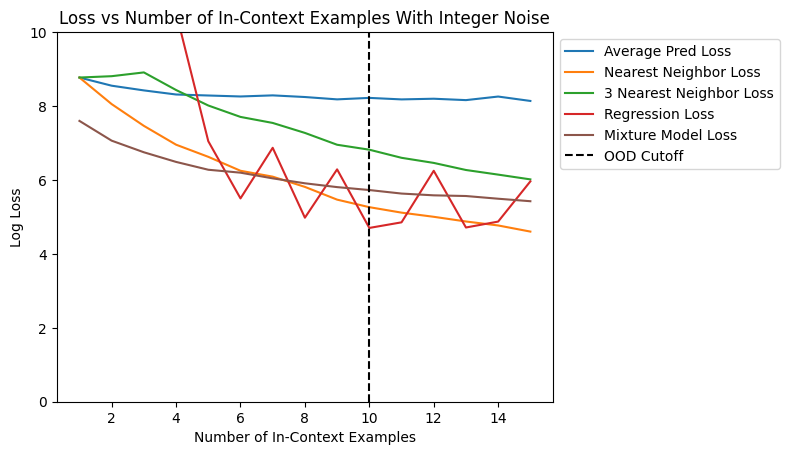

In [34]:
desired_data_lenght = 15

plt.plot(range(1, desired_data_lenght+1), np.log(average_lossses[:desired_data_lenght]), label='Average Pred Loss')
plt.plot(range(1, desired_data_lenght+1), np.log(nearest_neighbors_losses[:desired_data_lenght]), label='Nearest Neighbor Loss')
plt.plot(range(1, desired_data_lenght+1), np.log(nearest_neighbors_3_losses[:desired_data_lenght]), label='3 Nearest Neighbor Loss')
plt.plot(range(1, desired_data_lenght+1), np.log(regression_losses[:desired_data_lenght]), label='Regression Loss')
# plt.plot(range(1, desired_data_lenght+1), np.log(base_model_losses[:desired_data_lenght]), label='Base Model Loss')
plt.plot(range(1, desired_data_lenght+1), np.log(mixture_model_losses[:desired_data_lenght]), label='Mixture Model Loss', color='tab:brown')
# plt.axvline(x=10, color='black', linestyle='--', label='OOD Cutoff')
plt.axvline(x=10, color='black', linestyle='--', label='OOD Cutoff')
plt.ylim(0, 10)
plt.xlabel('Number of In-Context Examples')
plt.ylabel('Log Loss')
plt.title('Loss vs Number of In-Context Examples With Integer Noise')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

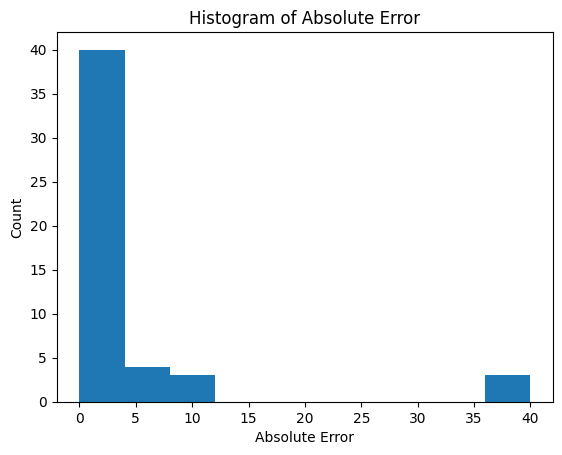

In [32]:
# Histogram

expected = np.array([179, 45, 185, 2, 77, 185, 187, 31, 124, 73, 160, 84, 28, 174, 29, 50, 165, 76, 115, 88, 127, 103, 74, 164, 21, 194, 35, 30, 76, 62, 93, 97, 163, 51, 111, 99, 176, 189, 50, 188, 151, 164, 8, 89, 24, 2, 174, 63, 90, 199])
actual = np.array([185, 45, 185, 2, 77, 185, 187, 31, 124, 37, 158, 84, 28, 174, 30, 50, 155, 76, 110, 88, 127, 103, 74, 164, 23, 194, 35, 30, 38, 62, 93, 97, 163, 51, 151, 99, 184, 189, 47, 188, 151, 164, 8, 93, 24, 2, 174, 70, 90, 190])
diff = np.abs(expected - actual)
plt.hist(diff)
plt.xlabel("Absolute Error")
plt.ylabel("Count")
plt.title("Histogram of Absolute Error")
plt.show()